In [30]:
%load_ext autoreload
%autoreload 2

import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
os.chdir("/nfs/students/winter-term-2020/project-4/schwienb/project-4")
from src.data.mnist import MNISTDataModule, ConstantDataset, RandomDataset
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.vae.vae_variance import VAEVariance
from src.models.vae.vae_variance_basic import BasicVAEVariance
from src.experiments.experiment import Experiment
import torch.nn.functional as F
from pytorch_lightning.callbacks import LearningRateMonitor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)

42

In [32]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.000,
   patience=3,
   verbose=True,
)
lr_monitor = LearningRateMonitor(logging_interval='step')
model_params = {
    'input_height': 32,
    'lr': 0.04, #1e-3,
    'z_dim': 2
}
dataset_params = {
    'resize': True
}
model = VAEVariance
dataset = MNISTDataModule


EarlyStopping mode set to min for monitoring val_loss.


In [33]:
exp = Experiment('VAEVariance_MNIST_1', 
                 model=model, dataset=dataset, model_params=model_params, dataset_params=dataset_params, callbacks=[early_stop_callback, lr_monitor])
exp.setup_new()


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Set SLURM handle signals.

  | Name         | Type            | Params
-------------------------------------------------
0 | encoder      | Encoder         | 97 K  
1 | decoder      | Decoder         | 97 K  
2 | fc_mu        | Conv2d          | 147 K 
3 | fc_var       | Conv2d          | 147 K 
4 | fc_mu_x      | ConvTranspose1d | 10    
5 | fc_log_var_x | ConvTranspose1d | 10    
/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


LR finder stopped early due to diverging loss.


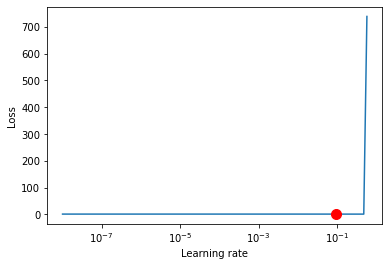

In [11]:
lr_finder = exp.trainer.tuner.lr_find(exp.model, exp.dataset)

# Results can be found in
lr_finder.results

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

# Pick point based on plot, or get suggestion
new_lr = lr_finder.suggestion()
exp.model.lr = new_lr

In [35]:
exp.train()

Set SLURM handle signals.

  | Name         | Type    | Params
-----------------------------------------
0 | encoder      | Encoder | 23 K  
1 | decoder      | Decoder | 23 K  
2 | fc_mu        | Linear  | 131 K 
3 | fc_var       | Linear  | 131 K 
4 | fc_mu_x      | Linear  | 1 M   
5 | fc_log_var_x | Linear  | 1 M   


Traceback (most recent call last):
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


RuntimeError: mat1 dim 1 must match mat2 dim 0

In [ ]:
exp.save()

In [13]:
from src.utils.vae import generate_images

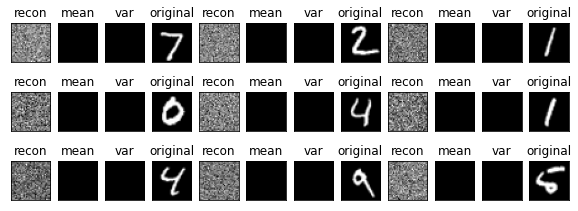

In [15]:
generate_images(exp.model, exp.dataset.test_dataloader(), input=32)